In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
dr=pd.read_csv("Tuna.csv")

In [21]:
dr.head(10)

,Tuna.hid,Tuna.id,Tuna.choice,price.skw,price.cosw,price.sko,price.coso,price.pw
0,1,1,skw,0.59,0.59,0.59,0.59,0.59
1,1,2,skw,0.69,0.84,0.69,0.89,0.59
2,1,3,skw,0.69,0.89,0.69,0.89,0.59
3,1,4,skw,0.49,0.39,0.89,0.39,0.67
4,1,5,cosw,0.87,0.59,0.87,0.59,0.59
5,1,6,cosw,0.89,0.89,0.89,0.45,0.67
6,2,1,skw,0.69,0.84,0.69,0.89,0.59
7,2,2,skw,0.69,0.89,0.89,0.89,0.59
8,2,3,cosw,0.89,0.49,0.89,0.49,0.67
9,2,4,cosw,0.89,0.59,0.89,0.49,0.67


In [22]:
dr=dr.drop(["Tuna.hid","Tuna.id"],axis=1)

In [23]:
dr

,Tuna.choice,price.skw,price.cosw,price.sko,price.coso,price.pw
0,skw,0.59,0.59,0.59,0.59,0.59
1,skw,0.69,0.84,0.69,0.89,0.59
2,skw,0.69,0.89,0.69,0.89,0.59
3,skw,0.49,0.39,0.89,0.39,0.67
4,cosw,0.87,0.59,0.87,0.59,0.59
...,...,...,...,...,...,...
13700,pw,0.88,0.69,0.82,0.69,0.25
13701,coso,0.81,0.69,0.82,0.59,0.65
13702,skw,0.29,0.87,0.29,0.87,0.65
13703,skw,0.82,0.69,0.82,0.69,0.65


In [24]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13705 entries, 0 to 13704
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tuna.choice  13705 non-null  object 
 1   price.skw    13705 non-null  float64
 2   price.cosw   13705 non-null  float64
 3   price.sko    13705 non-null  float64
 4   price.coso   13705 non-null  float64
 5   price.pw     13705 non-null  float64
dtypes: float64(5), object(1)
memory usage: 642.5+ KB


In [25]:
dr.isnull().sum()

Tuna.choice    0
price.skw      0
price.cosw     0
price.sko      0
price.coso     0
price.pw       0
dtype: int64

In [26]:
dr['Tuna.choice'].value_counts()

skw     6055
sko     2439
cosw    2238
coso    1923
pw      1050
Name: Tuna.choice, dtype: int64

<AxesSubplot:xlabel='Tuna.choice', ylabel='count'>

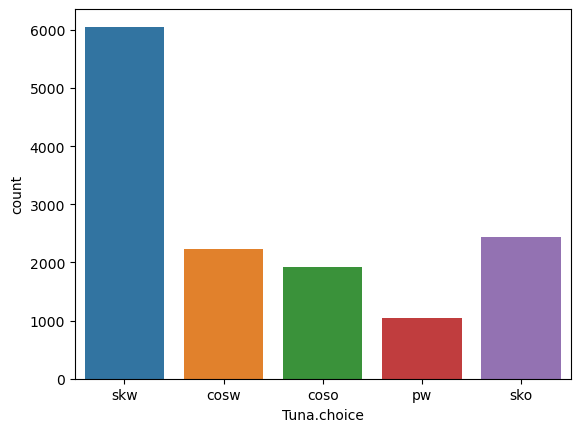

In [27]:
sns.countplot(x=dr['Tuna.choice'])

In [28]:
from sklearn.preprocessing import OrdinalEncoder

In [29]:
a=['Tuna.choice']
encoder=OrdinalEncoder()
dr[a]=encoder.fit_transform(dr[a])

In [30]:
dr['Tuna.choice']=dr['Tuna.choice'].astype(int)

In [31]:
display(dr)

,Tuna.choice,price.skw,price.cosw,price.sko,price.coso,price.pw
0,4,0.59,0.59,0.59,0.59,0.59
1,4,0.69,0.84,0.69,0.89,0.59
2,4,0.69,0.89,0.69,0.89,0.59
3,4,0.49,0.39,0.89,0.39,0.67
4,1,0.87,0.59,0.87,0.59,0.59
...,...,...,...,...,...,...
13700,2,0.88,0.69,0.82,0.69,0.25
13701,0,0.81,0.69,0.82,0.59,0.65
13702,4,0.29,0.87,0.29,0.87,0.65
13703,4,0.82,0.69,0.82,0.69,0.65


In [32]:
corr=dr.corr()
corr.style.background_gradient(cmap='winter')

,Tuna.choice,price.skw,price.cosw,price.sko,price.coso,price.pw
Tuna.choice,1.000000,-0.278367,0.218022,-0.034940,0.424064,-0.004048
price.skw,-0.278367,1.000000,0.127500,0.333413,0.081213,-0.059040
price.cosw,0.218022,0.127500,1.000000,-0.203771,0.647949,-0.104756
price.sko,-0.034940,0.333413,-0.203771,1.000000,-0.223248,0.081351
price.coso,0.424064,0.081213,0.647949,-0.223248,1.000000,-0.188057
price.pw,-0.004048,-0.059040,-0.104756,0.081351,-0.188057,1.000000


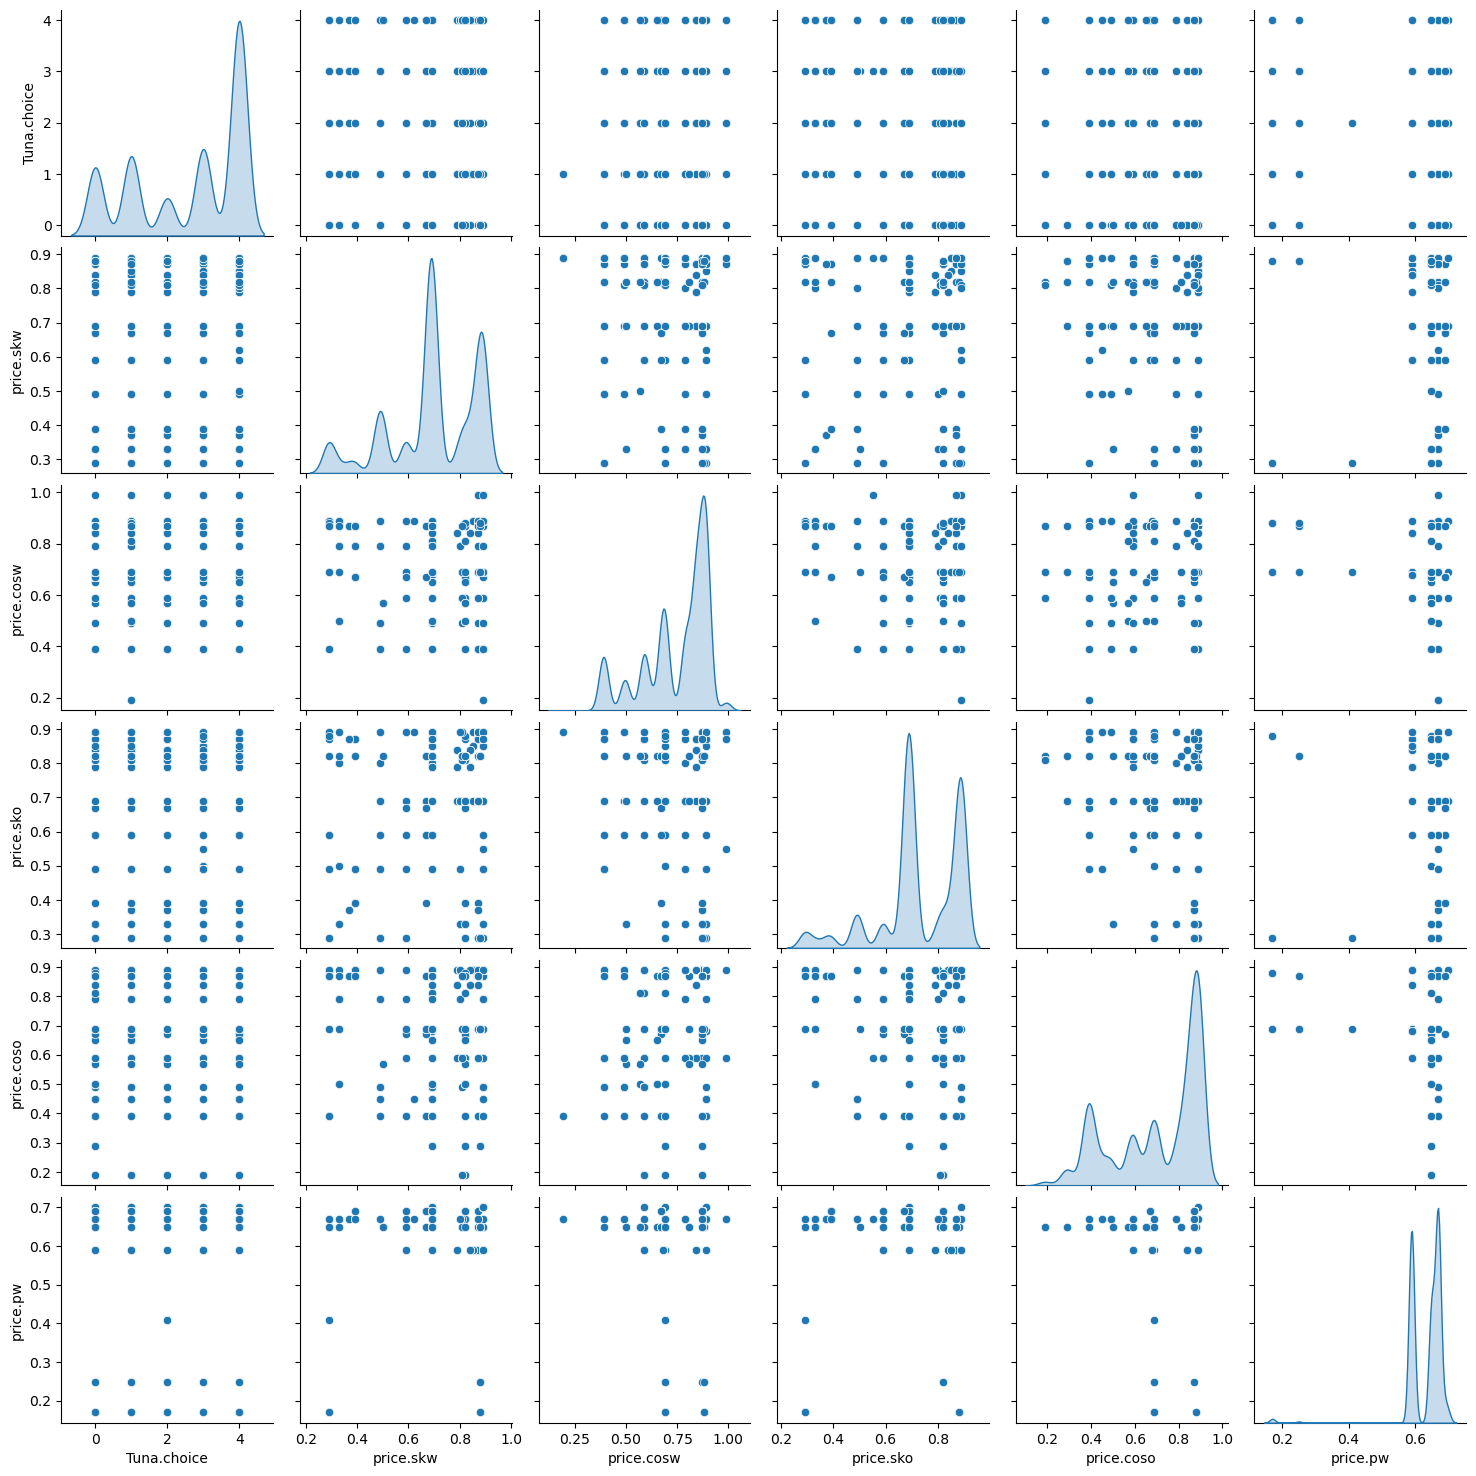

In [33]:
sns.pairplot(data=dr,diag_kind='kde')

In [34]:
x=dr[["price.skw","price.cosw","price.sko","price.coso","price.pw"]]
y=dr["Tuna.choice"]

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=108)

In [37]:
x_train

,price.skw,price.cosw,price.sko,price.coso,price.pw
6565,0.49,0.79,0.59,0.89,0.67
5093,0.79,0.84,0.79,0.89,0.59
6200,0.89,0.89,0.89,0.89,0.59
11012,0.69,0.89,0.69,0.89,0.59
5269,0.49,0.39,0.89,0.39,0.67
...,...,...,...,...,...
13142,0.89,0.59,0.89,0.49,0.67
13678,0.82,0.57,0.82,0.57,0.65
10699,0.69,0.84,0.69,0.89,0.59
8337,0.69,0.69,0.69,0.50,0.65


In [38]:
y_train

6565     3
5093     3
6200     4
11012    3
5269     4
        ..
13142    1
13678    3
10699    3
8337     0
12387    4
Name: Tuna.choice, Length: 10964, dtype: int32

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
y_pred=model.predict(x_test)
print("Predicted",y_pred)

Predicted [3 4 1 ... 4 4 4]


C:\Users\Kumaran\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [44]:
acc1=accuracy_score(y_test,y_pred)
print("Accuracy is:",acc1*100)

Accuracy is: 65.48704852243706


In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rmodel=RandomForestClassifier()

In [47]:
rmodel.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
pred=rmodel.predict(x_test)
print(pred)

[4 4 1 ... 4 4 4]


In [50]:
acc2=accuracy_score(pred,y_test)
print("Accuracy:",acc2*100)

Accuracy: 71.83509668004378


In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dmodel=DecisionTreeClassifier()
dmodel.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
pred2=dmodel.predict(x_test)
print(pred2)

[4 4 1 ... 4 4 4]


In [54]:
acc3=accuracy_score(pred2,y_test)
print("Accuracy:",acc3*100)

Accuracy: 71.57971543232397


In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
nmodel=GaussianNB()
nmodel.fit(x_train,y_train)

GaussianNB()

In [57]:
pred3=nmodel.predict(x_test)
print(pred3)

[3 1 1 ... 1 3 1]


In [58]:
acc4=accuracy_score(pred3,y_test)
print("Accuracy:",acc4*100)

Accuracy: 49.76286026997446
